# 1. Exploring the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
X = pd.read_csv(r'C:\Users\xps\Downloads\archive (32)\X_data.csv', index_col=0)
y_df = pd.read_csv(r'C:\Users\xps\Downloads\archive (32)\y_data.csv', index_col=0)
y = y_df['y']
# To understand more we can combine the features and target 
df = pd.concat([X, y_df], axis= 1)
df.head()


,Age,Systolic_BP,Diastolic_BP,Cholesterol,y
0,77.196340,85.288742,80.021878,79.957109,1.0
1,63.529850,99.379736,84.852361,110.382411,1.0
2,69.003986,111.349455,109.850616,100.828246,1.0
3,82.638210,95.056128,79.666851,87.066303,1.0
4,78.346286,109.154591,90.713220,92.511770,1.0


# 2. Understand the Data

* Let's discover first the features or columns we have in our dataset

In [4]:
df.columns


Index(['Age', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol', 'y'], dtype='object')

* Let's check if there is any missing values or data quality issues

In [5]:
df.isnull().sum()


Age             0
Systolic_BP     0
Diastolic_BP    0
Cholesterol     0
y               0
dtype: int64

* To understand the distribution of the target variable:

In [6]:
df['y'].value_counts(normalize=True)

1.0    0.5145
0.0    0.4855
Name: y, dtype: float64

# 3. Data Cleaning and Preprocessing


In [7]:
# We can fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

* Check the outliers

C:\Users\xps\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


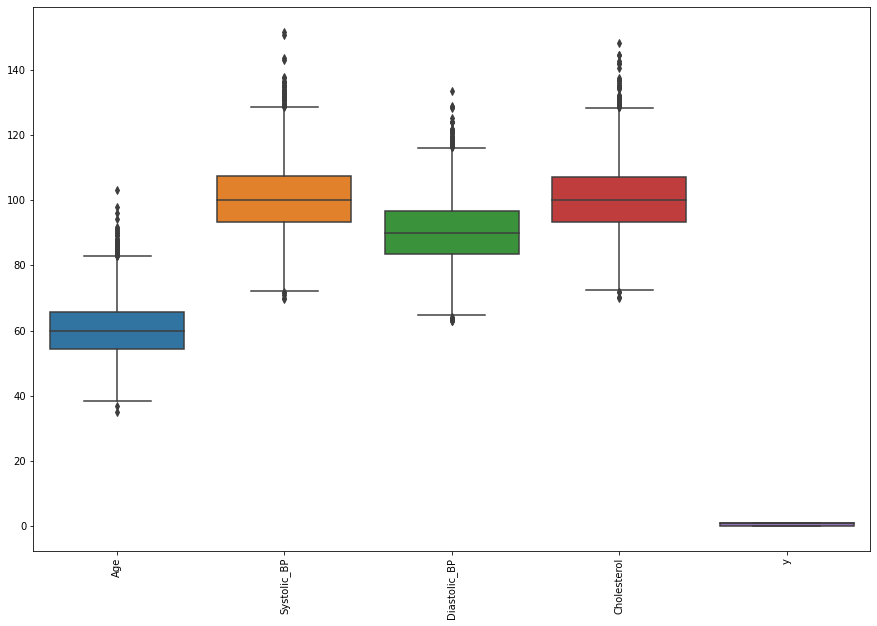

In [8]:
import seaborn as sns
# for each feature we can visualize potential outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Calculate correlations
correlations = df.corr()
correlations['y'].sort_values(ascending=False)


y               1.000000
Age             0.377440
Systolic_BP     0.339842
Cholesterol     0.315811
Diastolic_BP    0.181541
Name: y, dtype: float64

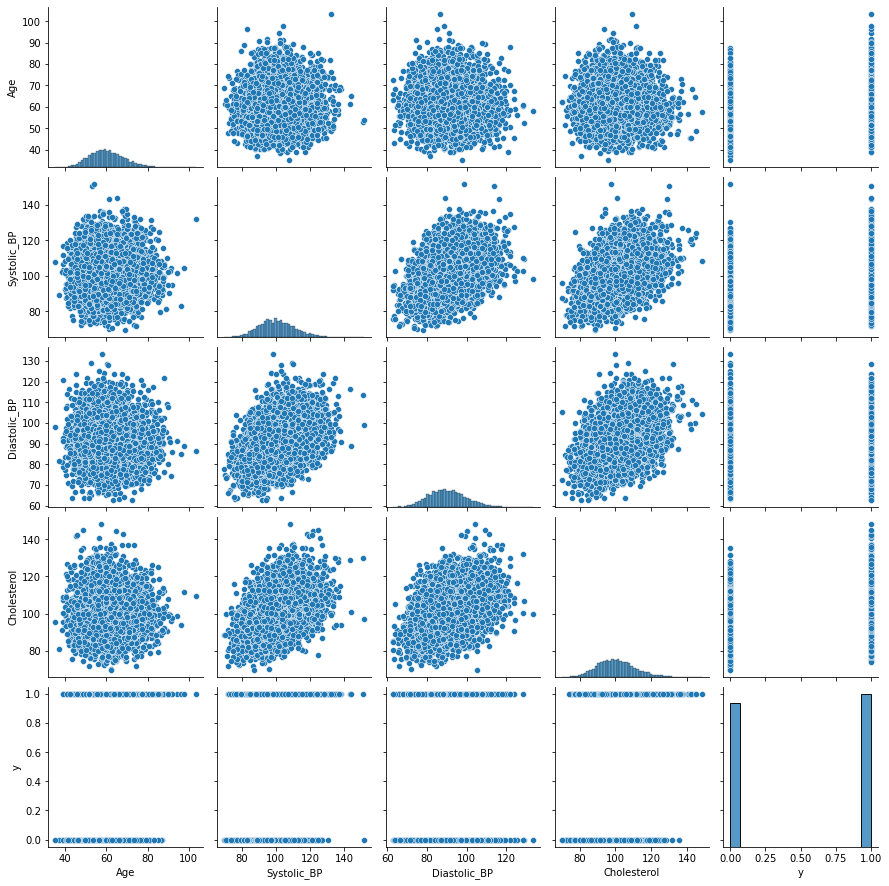

In [10]:
sns.pairplot(df)
plt.show()

To see the interaction between featuresm it can be visualized through heatmaps:

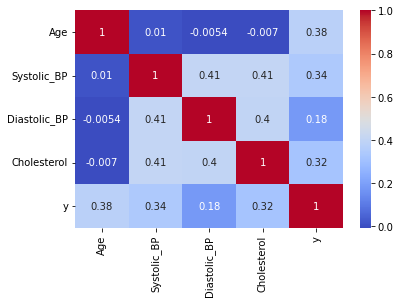

In [11]:
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

# 5. Prediction


Let's check Which model performs best on our dataset?

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_df['y'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("The Accuracy is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


The Accuracy is: 0.7466666666666667
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74       575
         1.0       0.76      0.75      0.75       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



-> The accuracy we got means that approximately 74.67% of the predictions made by your model were correct.

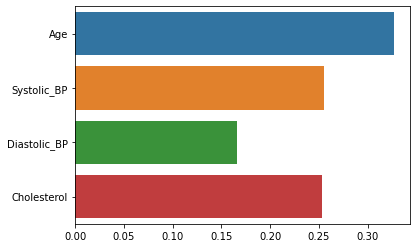

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Plot feature importances
importances = model.feature_importances_
sns.barplot(x=importances, y=df.columns[:-1])
plt.show()
